In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from numpy.random import RandomState
from scipy import stats
from permute.core import one_sample
from utils import *
from graph_effects_utils import *
prng = RandomState(42)
sns.set_style('whitegrid')
sns.set_context('paper', font_scale=1.5)

FIG_FOLDER = 'figures/main_effects'

# Calculate effect sizes, p-values, CIs

In [2]:
# Load data
df = load_to_df('data/twitter_data.json')
df = df[df['shown_to_user']==True].reset_index(drop=True)
df

100%|██████████| 1730/1730 [00:03<00:00, 523.07it/s]


,timeline,rank,prob_in_tl,user_id,user_summary_leaning,collected_at,shown_to_user,user_race,user_ethnicity,user_gender,...,full_text_len,tweet_age,partisanship,outgroup_animosity,outgroup_animosity_to_ingroup,outgroup_animosity_to_outgroup,ingroup_affect,outgroup_affect,user_time_key,user_summary_race
0,Engagement,1.0,1.000000,341,1,2023-02-11 17:05:08.233,True,[White],[None of these],Man,...,23,1064.087217,0.0,0,0,0,0.0,0.0,341_2023-02-11 17:05:08.233,White
1,Stated Preference,NaN,0.625000,341,1,2023-02-11 17:05:08.233,True,[White],[None of these],Man,...,23,1064.087217,0.0,0,0,0,0.0,0.0,341_2023-02-11 17:05:08.233,White
2,Stated Preference with Downranking,NaN,0.625000,341,1,2023-02-11 17:05:08.233,True,[White],[None of these],Man,...,23,1064.087217,0.0,0,0,0,0.0,0.0,341_2023-02-11 17:05:08.233,White
3,Engagement,2.0,1.000000,341,1,2023-02-11 17:05:08.233,True,[White],[None of these],Man,...,136,501.270550,1.0,1,0,1,-1.0,-1.0,341_2023-02-11 17:05:08.233,White
4,Engagement,3.0,1.000000,341,1,2023-02-11 17:05:08.233,True,[White],[None of these],Man,...,56,1195.270550,0.0,0,0,0,0.0,0.0,341_2023-02-11 17:05:08.233,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93045,Stated Preference,NaN,0.555556,165,-1,2023-02-28 05:55:47.757,True,[Asian],[None of these],Man,...,217,355.095950,0.0,0,0,0,0.0,0.0,165_2023-02-28 05:55:47.757,Asian or Native Hawaiian/other Pacific Islander
93046,Stated Preference with Downranking,NaN,0.555556,165,-1,2023-02-28 05:55:47.757,True,[Asian],[None of these],Man,...,217,355.095950,0.0,0,0,0,0.0,0.0,165_2023-02-28 05:55:47.757,Asian or Native Hawaiian/other Pacific Islander
93047,Chronological,10.0,1.000000,165,-1,2023-02-28 05:55:47.757,True,[Asian],[None of these],Man,...,86,201.162617,0.0,0,0,0,0.0,0.0,165_2023-02-28 05:55:47.757,Asian or Native Hawaiian/other Pacific Islander
93048,Stated Preference,NaN,0.555556,165,-1,2023-02-28 05:55:47.757,True,[Asian],[None of these],Man,...,86,201.162617,0.0,0,0,0,0.0,0.0,165_2023-02-28 05:55:47.757,Asian or Native Hawaiian/other Pacific Islander


In [3]:
# Calculate effects for engagement timeline
eng_effects = get_effects(df, Timeline.ENGAGEMENT)
eng_effects

/Users/micah/Developer/Research Code/twitter-analysis/utils.py:426: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(["user_time_key", "timeline"])[keys].agg(**aggregations)
/Users/micah/Developer/Research Code/twitter-analysis/utils.py:437: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return grouped.groupby(["user_id", "timeline"]).mean()
/Users/micah/Developer/Research Code/twitter-analysis/utils.py:794: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to ad

,Outcome,Standardized Effect,Unstandardized Effect,Chron Mean,Pers Mean,p-value,Confidence Interval (standardized),Confidence Interval (unstandardized)
8,Reader Pref (political),-0.180110,-0.064550,0.518799,0.465029,0.004800,"(-0.3035978934289888, -0.05483385394294088)","(-0.10829141760160275, -0.018194491090613746)"
8,Reader Pref (overall),0.064962,0.023282,0.507315,0.526067,0.018798,"(0.006127970278682171, 0.12281674335269571)","(0.003093265383681487, 0.04453623093348931)"
1,Out-group Perception (right users),-0.203847,-0.052365,-0.145270,-0.200024,0.000200,"(-0.30491140524571436, -0.09896602342250371)","(-0.07846637297325906, -0.025184474306644014)"
0,In-group Perception (right users),0.150958,0.031231,0.072492,0.102337,0.001800,"(0.04948150399247292, 0.24490254756449584)","(0.010829200172687597, 0.05058150566408035)"
1,Out-group Perception (left users),-0.156619,-0.030926,-0.097042,-0.131831,0.000200,"(-0.22185012495682838, -0.09201006527470745)","(-0.04345765097178443, -0.0183525132514767)"
0,In-group Perception (left users),0.052047,0.009087,0.056017,0.065868,0.095990,"(-0.013233553581124158, 0.11610336016763034)","(-0.0026356996008114614, 0.02005691311155561)"
3,Out-group Perception,-0.171378,-0.036536,-0.108109,-0.147480,0.000200,"(-0.2238473488314257, -0.11710966620207308)","(-0.047923647340623425, -0.025018622636015397)"
2,In-group Perception,0.080743,0.014752,0.059797,0.074237,0.001800,"(0.02541425683643367, 0.13445498367423733)","(0.004551314099657863, 0.02429355204328748)"
1,Out-group Animosity,0.235766,0.030813,0.085102,0.115692,0.000200,"(0.16969543307564, 0.30103954861168963)","(0.022049846893562687, 0.03932829394296014)"
0,Partisanship,0.243935,0.051418,0.151106,0.201816,0.000200,"(0.1793649725753746, 0.30695465542426925)","(0.037831373262440585, 0.06446690349597428)"


In [4]:
print(eng_effects.iloc[::-1].drop(columns=["p-value", "Confidence Interval (standardized)", "Confidence Interval (unstandardized)"]).to_latex(float_format="%.3f", index=False))

\begin{tabular}{lrrrr}
\toprule
Outcome & Standardized Effect & Unstandardized Effect & Chron Mean & Pers Mean \\
\midrule
Author Angry (overall) & 0.473 & 0.188 & 0.352 & 0.545 \\
Author Sad (overall) & 0.220 & 0.077 & 0.293 & 0.378 \\
Author Anxious (overall) & 0.232 & 0.100 & 0.391 & 0.492 \\
Author Happy (overall) & 0.016 & 0.013 & 1.307 & 1.330 \\
Reader Angry (overall) & 0.266 & 0.107 & 0.306 & 0.412 \\
Reader Sad (overall) & 0.086 & 0.032 & 0.316 & 0.356 \\
Reader Anxious (overall) & 0.119 & 0.051 & 0.346 & 0.398 \\
Reader Happy (overall) & 0.119 & 0.085 & 0.941 & 1.030 \\
Author Angry (political) & 0.754 & 0.299 & 1.128 & 1.438 \\
Author Sad (political) & 0.309 & 0.108 & 0.688 & 0.782 \\
Author Anxious (political) & 0.175 & 0.075 & 0.824 & 0.873 \\
Author Happy (political) & -0.061 & -0.048 & 0.513 & 0.532 \\
Reader Angry (political) & 0.377 & 0.152 & 1.042 & 1.192 \\
Reader Sad (political) & 0.007 & 0.003 & 0.835 & 0.840 \\
Reader Anxious (political) & -0.002 & -0.001 & 0.867 

In [5]:
print(eng_effects.iloc[::-1][["Outcome", "p-value"]].to_latex(float_format="%.4f", index=False))

\begin{tabular}{lr}
\toprule
Outcome & p-value \\
\midrule
Author Angry (overall) & 0.0002 \\
Author Sad (overall) & 0.0002 \\
Author Anxious (overall) & 0.0002 \\
Author Happy (overall) & 0.5093 \\
Reader Angry (overall) & 0.0002 \\
Reader Sad (overall) & 0.0020 \\
Reader Anxious (overall) & 0.0002 \\
Reader Happy (overall) & 0.0002 \\
Author Angry (political) & 0.0002 \\
Author Sad (political) & 0.0044 \\
Author Anxious (political) & 0.0364 \\
Author Happy (political) & 0.2256 \\
Reader Angry (political) & 0.0004 \\
Reader Sad (political) & 0.9409 \\
Reader Anxious (political) & 0.9961 \\
Reader Happy (political) & 0.7733 \\
Partisanship & 0.0002 \\
Out-group Animosity & 0.0002 \\
In-group Perception & 0.0018 \\
Out-group Perception & 0.0002 \\
In-group Perception (left users) & 0.0960 \\
Out-group Perception (left users) & 0.0002 \\
In-group Perception (right users) & 0.0018 \\
Out-group Perception (right users) & 0.0002 \\
Reader Pref (overall) & 0.0188 \\
Reader Pref (political) &

In [6]:
# Calculate effects for stated preference timeline
stated_effects = get_effects(df, Timeline.STATED_PREFERENCE)
stated_effects

/Users/micah/Developer/Research Code/twitter-analysis/utils.py:426: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(["user_time_key", "timeline"])[keys].agg(**aggregations)
/Users/micah/Developer/Research Code/twitter-analysis/utils.py:437: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return grouped.groupby(["user_id", "timeline"]).mean()
/Users/micah/Developer/Research Code/twitter-analysis/utils.py:794: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to ad

,Outcome,Standardized Effect,Unstandardized Effect,Chron Mean,Pers Mean,p-value,Confidence Interval (standardized),Confidence Interval (unstandardized)
8,Reader Pref (political),0.788305,0.282524,0.580724,0.854200,0.000200,"(0.6985737998804581, 0.8731956421228482)","(0.2504528869211382, 0.31280988061019127)"
8,Reader Pref (overall),1.105015,0.396031,0.507315,0.891789,0.000200,"(1.0563910915676338, 1.153121240818116)","(0.3787477404143034, 0.41343721949151785)"
1,Out-group Perception (right users),-0.092587,-0.023784,-0.145270,-0.175189,0.001200,"(-0.15545110764897946, -0.02727766782627991)","(-0.03996519145342807, -0.0069840854403310365)"
0,In-group Perception (right users),0.110581,0.022878,0.072492,0.099861,0.000200,"(0.05229311343788398, 0.16543262439143877)","(0.010718495858899682, 0.03434011771876126)"
1,Out-group Perception (left users),-0.099786,-0.019703,-0.097042,-0.119778,0.000200,"(-0.13906739133468632, -0.05727179935950996)","(-0.027530649444399598, -0.011547793292331215)"
0,In-group Perception (left users),0.083288,0.014541,0.056017,0.070532,0.000200,"(0.03966313252518264, 0.12408921405732244)","(0.006934182028690821, 0.021598010793343444)"
3,Out-group Perception,-0.098972,-0.021100,-0.108109,-0.132494,0.000200,"(-0.13217623096558248, -0.06353796213402318)","(-0.028107308702984394, -0.013699118349347617)"
2,In-group Perception,0.093606,0.017102,0.059797,0.077263,0.000200,"(0.05813939481061589, 0.1261321823842376)","(0.010669229431904893, 0.023055896284363685)"
1,Out-group Animosity,0.045157,0.005902,0.085102,0.093089,0.021998,"(0.00373307780798135, 0.08654656963908294)","(0.0005621841819259069, 0.011387008743886977)"
0,Partisanship,0.042176,0.008890,0.151106,0.162645,0.034597,"(7.749713853684448e-05, 0.08394303997771048)","(1.9898162255619495e-05, 0.017667044230539716)"


In [7]:
print(stated_effects.iloc[::-1].drop(columns=["p-value", "Confidence Interval (standardized)", "Confidence Interval (unstandardized)"]).to_latex(float_format="%.3f", index=False))

\begin{tabular}{lrrrr}
\toprule
Outcome & Standardized Effect & Unstandardized Effect & Chron Mean & Pers Mean \\
\midrule
Author Angry (overall) & 0.110 & 0.044 & 0.352 & 0.402 \\
Author Sad (overall) & 0.070 & 0.024 & 0.293 & 0.326 \\
Author Anxious (overall) & 0.082 & 0.035 & 0.391 & 0.427 \\
Author Happy (overall) & 0.189 & 0.150 & 1.307 & 1.455 \\
Reader Angry (overall) & 0.095 & 0.038 & 0.306 & 0.350 \\
Reader Sad (overall) & 0.056 & 0.021 & 0.316 & 0.344 \\
Reader Anxious (overall) & 0.082 & 0.035 & 0.346 & 0.384 \\
Reader Happy (overall) & 0.439 & 0.314 & 0.941 & 1.249 \\
Author Angry (political) & 0.205 & 0.081 & 1.084 & 1.173 \\
Author Sad (political) & 0.170 & 0.059 & 0.675 & 0.731 \\
Author Anxious (political) & 0.043 & 0.018 & 0.804 & 0.821 \\
Author Happy (political) & 0.062 & 0.049 & 0.523 & 0.589 \\
Reader Angry (political) & 0.142 & 0.057 & 1.014 & 1.087 \\
Reader Sad (political) & 0.088 & 0.033 & 0.814 & 0.858 \\
Reader Anxious (political) & 0.058 & 0.025 & 0.839 & 0.

In [8]:
print(stated_effects.iloc[::-1][["Outcome", "p-value"]].to_latex(float_format="%.4f", index=False))

\begin{tabular}{lr}
\toprule
Outcome & p-value \\
\midrule
Author Angry (overall) & 0.0002 \\
Author Sad (overall) & 0.0006 \\
Author Anxious (overall) & 0.0002 \\
Author Happy (overall) & 0.0002 \\
Reader Angry (overall) & 0.0002 \\
Reader Sad (overall) & 0.0016 \\
Reader Anxious (overall) & 0.0002 \\
Reader Happy (overall) & 0.0002 \\
Author Angry (political) & 0.0030 \\
Author Sad (political) & 0.0084 \\
Author Anxious (political) & 0.3786 \\
Author Happy (political) & 0.0358 \\
Reader Angry (political) & 0.0268 \\
Reader Sad (political) & 0.1806 \\
Reader Anxious (political) & 0.2366 \\
Reader Happy (political) & 0.0002 \\
Partisanship & 0.0346 \\
Out-group Animosity & 0.0220 \\
In-group Perception & 0.0002 \\
Out-group Perception & 0.0002 \\
In-group Perception (left users) & 0.0002 \\
Out-group Perception (left users) & 0.0002 \\
In-group Perception (right users) & 0.0002 \\
Out-group Perception (right users) & 0.0012 \\
Reader Pref (overall) & 0.0002 \\
Reader Pref (political) &

In [9]:
stated_downranking_effects = get_effects(df, Timeline.STATED_PREFERENCE_DOWNRANKING)
stated_downranking_effects

/Users/micah/Developer/Research Code/twitter-analysis/utils.py:426: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(["user_time_key", "timeline"])[keys].agg(**aggregations)
/Users/micah/Developer/Research Code/twitter-analysis/utils.py:437: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return grouped.groupby(["user_id", "timeline"]).mean()
/Users/micah/Developer/Research Code/twitter-analysis/utils.py:794: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to ad

,Outcome,Standardized Effect,Unstandardized Effect,Chron Mean,Pers Mean,p-value,Confidence Interval (standardized),Confidence Interval (unstandardized)
8,Reader Pref (political),0.810833,0.290598,0.585407,0.869878,0.000200,"(0.721983480984604, 0.8973116943670452)","(0.2585366694513715, 0.32182285684448786)"
8,Reader Pref (overall),1.116835,0.400267,0.507315,0.895529,0.000200,"(1.0676081176919556, 1.1655917043166337)","(0.3825353842208079, 0.4177238060789715)"
1,Out-group Perception (right users),0.033836,0.008692,-0.145270,-0.136675,0.345965,"(-0.039740561201356356, 0.10662897848200101)","(-0.010235708645462138, 0.02743062844423546)"
0,In-group Perception (right users),0.034688,0.007176,0.072492,0.077257,0.248175,"(-0.028824155490997108, 0.09641361337470235)","(-0.0059170812951199955, 0.01995255986879173)"
1,Out-group Perception (left users),0.052528,0.010372,-0.097042,-0.090601,0.018198,"(0.006597395211806384, 0.09878425621828393)","(0.0012821922328869577, 0.019576490652096042)"
0,In-group Perception (left users),-0.021335,-0.003725,0.056017,0.053115,0.353965,"(-0.0685529525664726, 0.02531284037300427)","(-0.012265845927936586, 0.004406490356767668)"
3,Out-group Perception,0.045583,0.009718,-0.108109,-0.101174,0.014799,"(0.006114686844061676, 0.08423078737012404)","(0.0015822195851907112, 0.017983933541931313)"
2,In-group Perception,-0.003995,-0.000730,0.059797,0.058655,0.812319,"(-0.043311029758453135, 0.03412857242638603)","(-0.00768097565992117, 0.006204394948638957)"
1,Out-group Animosity,-0.251635,-0.032886,0.085102,0.054479,0.000200,"(-0.30110546574289754, -0.20148584617965792)","(-0.0393888685203686, -0.026436584540494953)"
0,Partisanship,-0.165510,-0.034887,0.151106,0.118934,0.000200,"(-0.21352408676961648, -0.1183615387495282)","(-0.04506466900406808, -0.02503595542467201)"


In [10]:
print(stated_downranking_effects.iloc[::-1].drop(columns=["p-value", "Confidence Interval (standardized)", "Confidence Interval (unstandardized)"]).to_latex(float_format="%.3f", index=False))

\begin{tabular}{lrrrr}
\toprule
Outcome & Standardized Effect & Unstandardized Effect & Chron Mean & Pers Mean \\
\midrule
Author Angry (overall) & -0.058 & -0.023 & 0.352 & 0.338 \\
Author Sad (overall) & -0.011 & -0.004 & 0.293 & 0.299 \\
Author Anxious (overall) & 0.022 & 0.009 & 0.391 & 0.402 \\
Author Happy (overall) & 0.242 & 0.192 & 1.307 & 1.497 \\
Reader Angry (overall) & -0.036 & -0.015 & 0.306 & 0.298 \\
Reader Sad (overall) & -0.015 & -0.006 & 0.316 & 0.319 \\
Reader Anxious (overall) & 0.025 & 0.011 & 0.346 & 0.360 \\
Reader Happy (overall) & 0.490 & 0.350 & 0.941 & 1.283 \\
Author Angry (political) & -0.275 & -0.109 & 1.036 & 0.938 \\
Author Sad (political) & 0.015 & 0.005 & 0.653 & 0.657 \\
Author Anxious (political) & -0.052 & -0.022 & 0.790 & 0.761 \\
Author Happy (political) & 0.145 & 0.115 & 0.536 & 0.668 \\
Reader Angry (political) & -0.158 & -0.063 & 0.991 & 0.942 \\
Reader Sad (political) & -0.002 & -0.001 & 0.800 & 0.810 \\
Reader Anxious (political) & 0.011 & 0.

In [11]:
print(stated_downranking_effects.iloc[::-1][["Outcome", "p-value"]].to_latex(float_format="%.4f", index=False))

\begin{tabular}{lr}
\toprule
Outcome & p-value \\
\midrule
Author Angry (overall) & 0.0124 \\
Author Sad (overall) & 0.5959 \\
Author Anxious (overall) & 0.2278 \\
Author Happy (overall) & 0.0002 \\
Reader Angry (overall) & 0.0756 \\
Reader Sad (overall) & 0.4552 \\
Reader Anxious (overall) & 0.1388 \\
Reader Happy (overall) & 0.0002 \\
Author Angry (political) & 0.0002 \\
Author Sad (political) & 0.8267 \\
Author Anxious (political) & 0.3306 \\
Author Happy (political) & 0.0002 \\
Reader Angry (political) & 0.0278 \\
Reader Sad (political) & 0.9727 \\
Reader Anxious (political) & 0.8483 \\
Reader Happy (political) & 0.0002 \\
Partisanship & 0.0002 \\
Out-group Animosity & 0.0002 \\
In-group Perception & 0.8123 \\
Out-group Perception & 0.0148 \\
In-group Perception (left users) & 0.3540 \\
Out-group Perception (left users) & 0.0182 \\
In-group Perception (right users) & 0.2482 \\
Out-group Perception (right users) & 0.3460 \\
Reader Pref (overall) & 0.0002 \\
Reader Pref (political) &

# Graph effects

/Users/micah/Developer/Research Code/twitter-analysis/graph_effects_utils.py:167: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(
/Users/micah/Developer/Research Code/twitter-analysis/graph_effects_utils.py:176: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(y_labels)


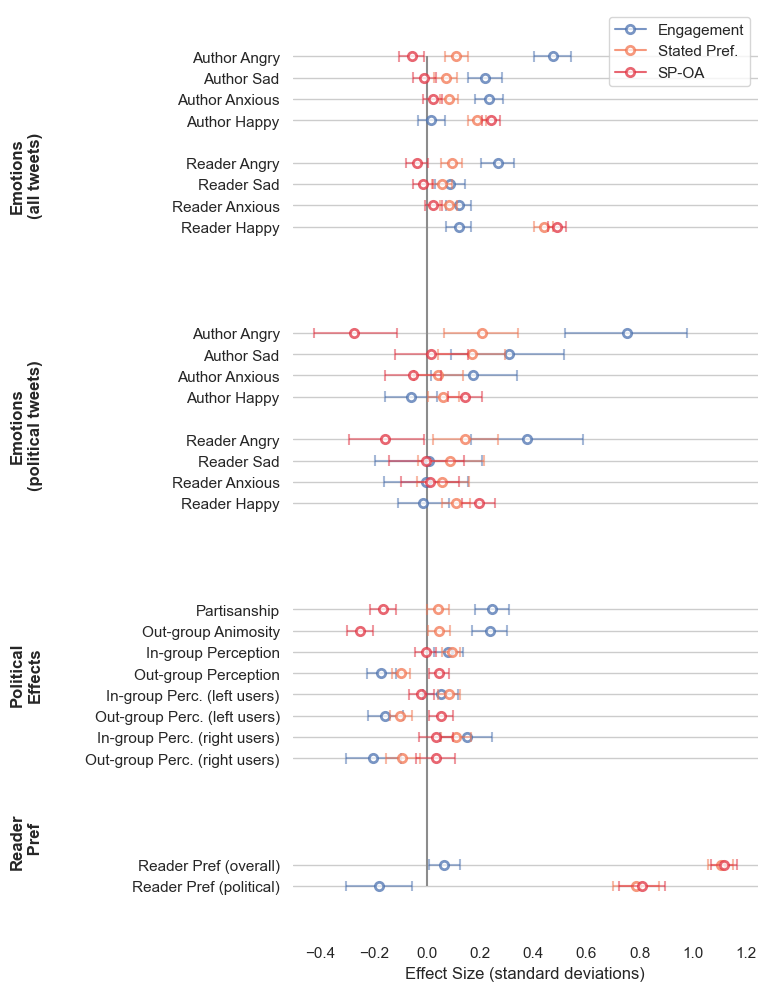

In [12]:
graph_effects_for_tl(
    eng_effects=eng_effects,
    stated_effects=stated_effects,
    stated_downranking_effects=stated_downranking_effects,
    save_file=f'{FIG_FOLDER}/effects.pdf'
)

/Users/micah/Developer/Research Code/twitter-analysis/graph_effects_utils.py:167: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(
/Users/micah/Developer/Research Code/twitter-analysis/graph_effects_utils.py:176: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(y_labels)


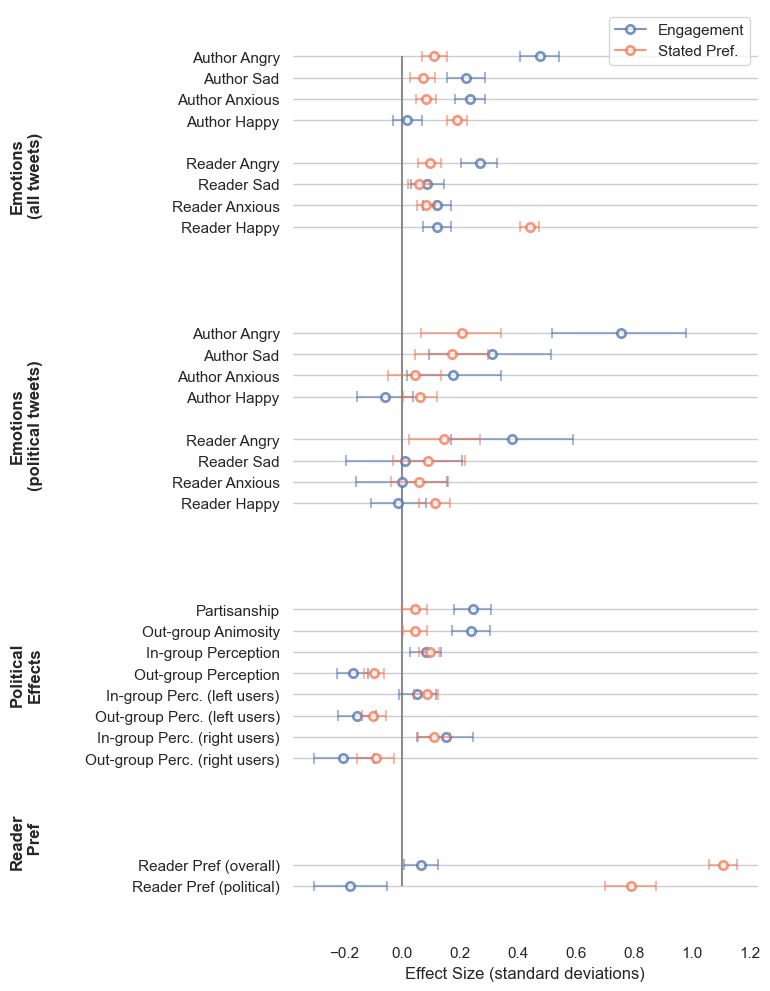

In [13]:
graph_effects_for_tl(
    eng_effects=eng_effects,
    stated_effects=stated_effects,
    save_file=f'{FIG_FOLDER}/effects_eng_sp.pdf'
)

/Users/micah/Developer/Research Code/twitter-analysis/graph_effects_utils.py:167: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(
/Users/micah/Developer/Research Code/twitter-analysis/graph_effects_utils.py:176: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(y_labels)


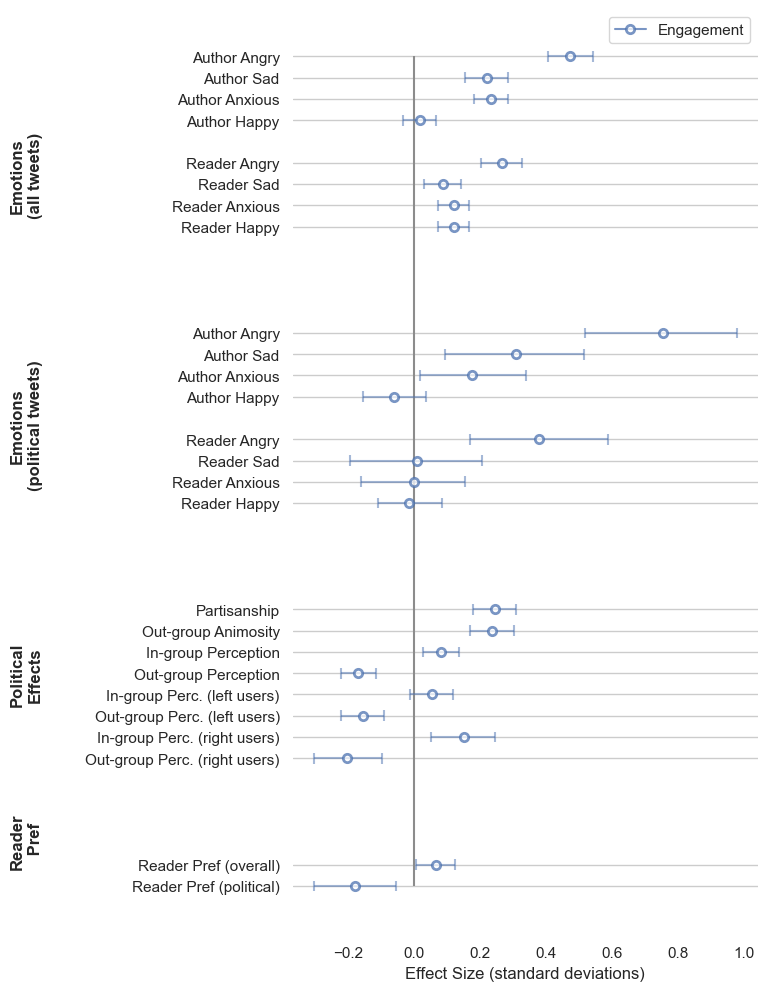

In [14]:
graph_effects_for_tl(
    eng_effects=eng_effects,
    save_file=f'{FIG_FOLDER}/effects_eng.pdf'
)

# FDR sharpened p-values for pre-registered analyses
For our pre-registered effects that should be interpreted as confirmatory analysis, i.e., the effect of engagement-based ranking relative to the chronological timeline on sociopolitical outcomes and user stated preference, we compute false discovery rate sharpened p-values (also known as q-values) for the hypohtesis tests.

In [15]:
sharpened_p = get_sharpened_p(eng_effects['p-value'])
eng_effects['Sharpened p-value'] = sharpened_p 
eng_effects

/Users/micah/Developer/Research Code/twitter-analysis/utils.py:919: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  res_df[alpha] = rejected


,Outcome,Standardized Effect,Unstandardized Effect,Chron Mean,Pers Mean,p-value,Confidence Interval (standardized),Confidence Interval (unstandardized),Sharpened p-value
8,Reader Pref (political),-0.180110,-0.064550,0.518799,0.465029,0.004800,"(-0.3035978934289888, -0.05483385394294088)","(-0.10829141760160275, -0.018194491090613746)",0.0032
8,Reader Pref (overall),0.064962,0.023282,0.507315,0.526067,0.018798,"(0.006127970278682171, 0.12281674335269571)","(0.003093265383681487, 0.04453623093348931)",0.0080
1,Out-group Perception (right users),-0.203847,-0.052365,-0.145270,-0.200024,0.000200,"(-0.30491140524571436, -0.09896602342250371)","(-0.07846637297325906, -0.025184474306644014)",0.0005
0,In-group Perception (right users),0.150958,0.031231,0.072492,0.102337,0.001800,"(0.04948150399247292, 0.24490254756449584)","(0.010829200172687597, 0.05058150566408035)",0.0016
1,Out-group Perception (left users),-0.156619,-0.030926,-0.097042,-0.131831,0.000200,"(-0.22185012495682838, -0.09201006527470745)","(-0.04345765097178443, -0.0183525132514767)",0.0005
0,In-group Perception (left users),0.052047,0.009087,0.056017,0.065868,0.095990,"(-0.013233553581124158, 0.11610336016763034)","(-0.0026356996008114614, 0.02005691311155561)",0.0331
3,Out-group Perception,-0.171378,-0.036536,-0.108109,-0.147480,0.000200,"(-0.2238473488314257, -0.11710966620207308)","(-0.047923647340623425, -0.025018622636015397)",0.0005
2,In-group Perception,0.080743,0.014752,0.059797,0.074237,0.001800,"(0.02541425683643367, 0.13445498367423733)","(0.004551314099657863, 0.02429355204328748)",0.0016
1,Out-group Animosity,0.235766,0.030813,0.085102,0.115692,0.000200,"(0.16969543307564, 0.30103954861168963)","(0.022049846893562687, 0.03932829394296014)",0.0005
0,Partisanship,0.243935,0.051418,0.151106,0.201816,0.000200,"(0.1793649725753746, 0.30695465542426925)","(0.037831373262440585, 0.06446690349597428)",0.0005


# Out-group animosity by in-group vs out-group

In [16]:
# Fix names for graphing purposes
df['timeline'] = df['timeline'].apply(lambda x: 'SP-OA' if x == "Stated Preference with Downranking" else x)

In [17]:
# Calculate means by timeline in political df
keys = EMOTION_KEYS + ['author_angry_binary',
     'value', 'partisanship', 'outgroup_animosity',
     'outgroup_animosity_to_ingroup', 'outgroup_animosity_to_outgroup',
     'ingroup_affect', 'outgroup_affect', 'ingroup_tweet', 'outgroup_tweet',
     'is_political'
     ]
df['author_angry_binary'] = (df['author_angry'] > 0).astype(int)

pol_df = df[df['is_political'] == True]
ate_df = get_mean_by_tl(pol_df, keys)

/Users/micah/Developer/Research Code/twitter-analysis/utils.py:426: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(["user_time_key", "timeline"])[keys].agg(**aggregations)
/Users/micah/Developer/Research Code/twitter-analysis/utils.py:437: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return grouped.groupby(["user_id", "timeline"]).mean()
/Users/micah/Developer/Research Code/twitter-analysis/utils.py:446: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to ad

In [18]:
ate_df = ate_df.reset_index()
ate_df

,timeline,author_angry,author_anxious,author_sad,author_happy,reader_angry,reader_anxious,reader_sad,reader_happy,author_angry_binary,value,partisanship,outgroup_animosity,outgroup_animosity_to_ingroup,outgroup_animosity_to_outgroup,ingroup_affect,outgroup_affect,ingroup_tweet,outgroup_tweet,is_political
0,Chronological,1.117375,0.790690,0.694717,0.543161,1.007997,0.850496,0.823134,0.454604,0.521511,0.437113,0.712956,0.369390,0.075704,0.293687,0.206751,-0.429635,0.472771,0.115721,1.0
1,Engagement,1.438704,0.856547,0.793371,0.536511,1.165389,0.840566,0.817247,0.452140,0.623123,0.341071,0.838383,0.438533,0.122363,0.316170,0.239483,-0.502307,0.491200,0.168511,1.0
2,Stated Preference,1.220712,0.812680,0.758279,0.637983,1.087030,0.859711,0.853216,0.589242,0.543086,0.822913,0.742923,0.366007,0.046517,0.319490,0.280005,-0.465917,0.522723,0.082432,1.0
3,SP-OA,0.972731,0.757886,0.686144,0.720535,0.951823,0.839410,0.816514,0.667179,0.453301,0.844010,0.585254,0.168922,0.016158,0.152764,0.226363,-0.373751,0.421135,0.059686,1.0


In [19]:
# Convert to percentages and add in middle bar for stacked barplot.
ate_df['ingroup_tweet'] = ate_df['ingroup_tweet'] * 100
ate_df['outgroup_tweet'] = ate_df['outgroup_tweet'] * 100
ate_df['moderate'] = 100 - ate_df['outgroup_tweet']
ate_df['total'] = 100
ate_df['outgroup_animosity_to_outgroup'] = ate_df['outgroup_animosity_to_outgroup'] * 100
ate_df['outgroup_animosity'] = ate_df['outgroup_animosity']* 100
ate_df = ate_df.reset_index()

In [20]:
ate_df["timeline"] = ate_df["timeline"].astype(str)

In [21]:
def graph_in_out_group(ate_df, file_name):
    fig, axes = plt.subplots(1, 2, sharey=True, figsize=(14, 3))


    MODERATE = '#E9C46A'
    INGROUP = '#264653'
    OUTGROUP = '#E76F51'
    # First plot
    bar1 = sns.barplot(ax = axes[0], data=ate_df, x='total', y='timeline', color=OUTGROUP, orient='h', width=.6)

    bar2 = sns.barplot(ax = axes[0], data=ate_df, x='moderate', y='timeline', color=MODERATE, orient='h', width=.6)


    bar3 = sns.barplot(ax = axes[0], data=ate_df, x='ingroup_tweet', y='timeline', color=INGROUP, orient='h', width=.6)



    top_bar = mpatches.Patch(color=INGROUP, label='In-group')
    middle_bar = mpatches.Patch(color=MODERATE, label='Moderate')
    bottom_bar = mpatches.Patch(color=OUTGROUP, label='Out-group')

    axes[0].set_title('Political tweets by in-group and out-group', fontweight='bold', pad=10)
    axes[0].set(ylabel=None)
    axes[0].set_xlabel("Percentage of political tweets", labelpad=10)


    # Second plot
    bar4 = sns.barplot(data=ate_df, x='outgroup_animosity', y='timeline', color=OUTGROUP, ax=axes[1], orient='h', width=.6)

    bar5 = sns.barplot(data=ate_df, x='outgroup_animosity_to_outgroup', y='timeline', color=INGROUP, ax=axes[1], orient='h', width=.6)

    top_bar_2 = mpatches.Patch(color=INGROUP, label='Animosity to out-group')
    bottom_bar_2 = mpatches.Patch(color=OUTGROUP, label='Animosity to in-group')

    axes[1].set_ylabel(None)
    axes[1].set_title('Animosity to in-group and out-group', fontweight='bold', pad=10)
    axes[1].set_xlabel("Percentage of political tweets with out-group animosity", labelpad=10)



    axes[0].legend(handles=[top_bar, middle_bar, bottom_bar],  loc='upper left')
    axes[1].legend(handles=[top_bar_2, bottom_bar_2], loc='upper left')
    axes[0].margins(x=0)
    axes[1].margins(x=0)
    axes[1].set_xticks([0, 10, 20, 30, 40, 50])

    plt.tight_layout()
    plt.savefig(f"figures/oga/{file_name}", bbox_inches='tight')

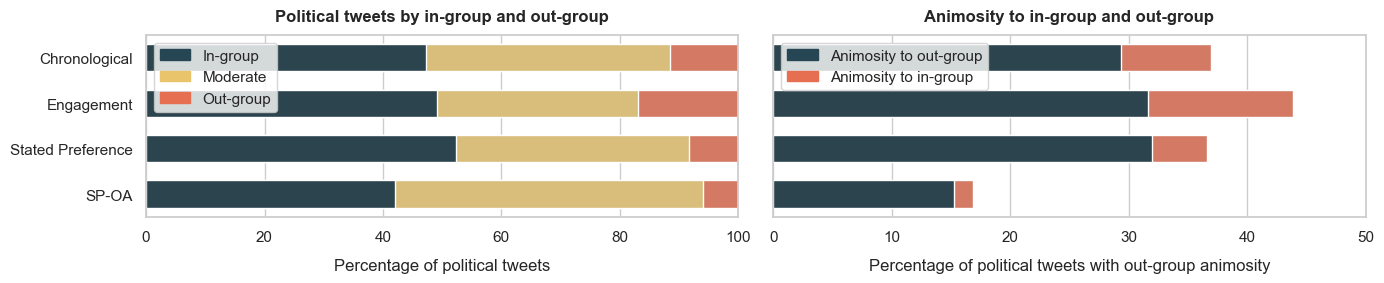

In [22]:
graph_in_out_group(ate_df, "combined_animosity.pdf")

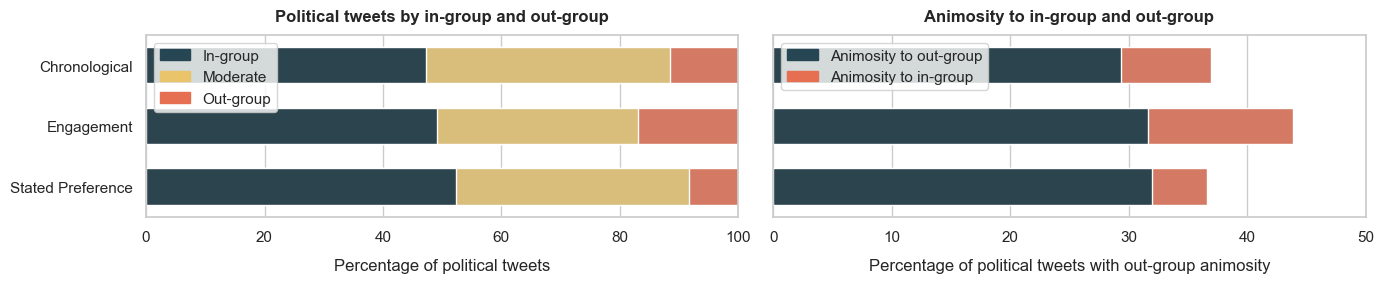

In [23]:
graph_in_out_group(ate_df[ate_df["timeline"] != "SP-OA"], "combined_animosity_main.pdf")